In [6]:
%reset

# Testing your models

# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
from sklearn.model_selection import train_test_split

# Read in the data.
data = np.asarray(pd.read_csv('data/testing_your_models.csv', header=None))

# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

acc

0.9583333333333334

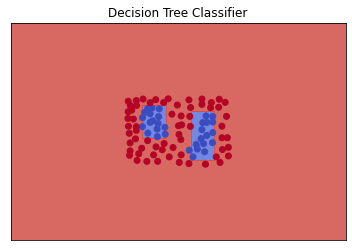

In [22]:
# This is the rough visualization for the problem solved above.

import matplotlib.pyplot as plt

h = .002

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())

plt.ylim(yy.min(), yy.max())

plt.xticks(())

plt.yticks(())

plt.title('Decision Tree Classifier')

plt.show()

In [22]:
%reset

# Start Workshop

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests.evaluation_metrics_tests as t

# Read in our dataset
df = pd.read_table('data/sms_spam_collection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
# Fit each of the 4 models
# This might take some time to run
naive_bayes.fit(training_data, y_train)

bag_mod.fit(training_data, y_train)

rf_mod.fit(training_data, y_train)

ada_mod.fit(training_data, y_train)

svm_mod.fit(training_data, y_train)

SVC()

In [24]:
# The models you fit above were fit on which data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_fit_on to only contain the correct string names
# of values that you oassed to the above models

models_fit_on = {c, e} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_one(models_fit_on)

That's right!  You need to fit on both parts of the data pertaining to training data!


In [25]:
# Make predictions using each of your models

preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

In [26]:
# Which data was used in the predict method to see how well your
# model would work on new data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_predict_on to only contain the correct string names
# of values that you oassed to the above models

models_predict_on = {f} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_two(models_predict_on)

That's right! To see how well our models perform in a new setting, you will want to predict on the test set of data.


In [27]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("Since these match, we correctly calculated our metric!")

0.9885139985642498
0.9885139985642498
Since these match, we correctly calculated our metric!


In [28]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/(pred_pos)


print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9720670391061452
0.9720670391061452
If the above match, you got it!


In [29]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    actual_pos = (actual==1).sum()
    return tp/(actual_pos)


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9405405405405406
0.9405405405405406
If the above match, you got it!


In [30]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    pres = precision(preds, actual)
    rec = recall(preds, actual)
    
    return (2 * pres * rec) / (pres + rec) # calculate f1-score here


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9560439560439562
0.9560439560439562
If the above match, you got it!


In [31]:
# add the letter of the most appropriate metric to each statement
# in the dictionary
a = "recall"
b = "precision"
c = "accuracy"
d = 'f1-score'


seven_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': c,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': b, 
'We care equally about identifying positive and negative cases': d    
}

t.sol_seven(seven_sol)

That's right!  It isn't really necessary to memorize these in practice, but it is important to know they exist and know why might use one metric over another for a particular situation.


In [15]:
# use the answers you found to the previous questiona, then match the model that did best for each metric
a = "naive-bayes"
b = "bagging"
c = "random-forest"
d = 'ada-boost'
e = "svm"


eight_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': a,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': c, 
'We care equally about identifying positive and negative cases': a  
}

t.sol_eight(eight_sol)

That's right!  Naive Bayes was the best model for all of our metrics except precision!


In [32]:
def display_metrics(model_name, predictions, test_values):
    print(f'Displaying predictions for: {model_name}')
    print(f'Accuracy: {accuracy_score(test_values, predictions)}')
    print(f'Precision: {precision_score(test_values, predictions)}')
    print(f'Recall: {recall_score(test_values, predictions)}')
    print(f'F1 Score: {f1_score(test_values, predictions)}')

display_metrics('Naive Bayes', preds_nb, y_test)
display_metrics('Bagging', preds_bag, y_test)
display_metrics('RF', preds_rf, y_test)
display_metrics('Boosting', preds_ada, y_test)
display_metrics('SVM', preds_svm, y_test)

Displaying predictions for: Naive Bayes
Accuracy: 0.9885139985642498
Precision: 0.9720670391061452
Recall: 0.9405405405405406
F1 Score: 0.9560439560439562
Displaying predictions for: Bagging
Accuracy: 0.9755922469490309
Precision: 0.9171270718232044
Recall: 0.8972972972972973
F1 Score: 0.907103825136612
Displaying predictions for: RF
Accuracy: 0.9813352476669059
Precision: 1.0
Recall: 0.8594594594594595
F1 Score: 0.9244186046511628
Displaying predictions for: Boosting
Accuracy: 0.9770279971284996
Precision: 0.9693251533742331
Recall: 0.8540540540540541
F1 Score: 0.9080459770114943
Displaying predictions for: SVM
Accuracy: 0.9849246231155779
Precision: 0.9939759036144579
Recall: 0.8918918918918919
F1 Score: 0.9401709401709402


In [18]:
# import fbeta_score
from sklearn.metrics import fbeta_score

# Show that you can produce the same f1_score results using fbeta_score
f1score = f1_score(y_test, preds_nb)
fbetascore = fbeta_score(y_test, preds_nb, beta=1)

f1score, fbetascore

NameError: name 'f1_score' is not defined

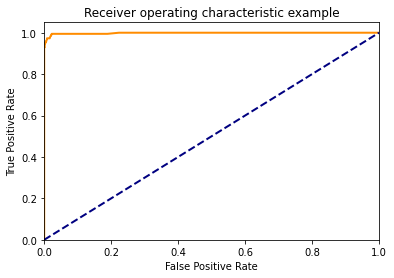

0.9297297297297298

In [13]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test) 

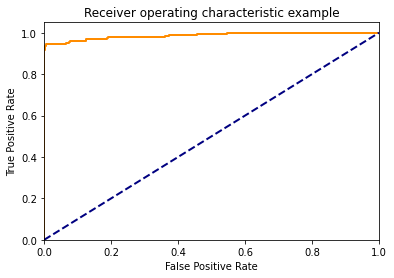

0.9682007338464294

In [42]:
build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test) 

In [1]:
%reset

# Regression metrics

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import tests.evaluation_metrics_tests as t

boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# When can you use the model - use each option as many times as necessary
a = 'regression'
b = 'classification'
c = 'both regression and classification'

models = {
    'decision trees': c,
    'random forest': c,
    'adaptive boosting': c,
    'logistic regression': b,
    'linear regression': a
}

#checks your answer, no need to change this code
t.q1_check(models)

That's right!  All but logistic regression can be used for predicting numeric values.  And linear regression is the only one of these that you should not use for predicting categories.  Technically sklearn won't stop you from doing most of anything you want, but you probably want to treat cases in the way you found by answering this question!


In [3]:
# Import models from sklearn - notice you will want to use 
# the regressor version (not classifier) - googling to find 
# each of these is what we all do!
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [4]:
# Instantiate each of the models you imported
# For now use the defaults for all the hyperparameters

tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()

In [5]:
# Fit each of your models using the training data
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predict on the test values for each model

preds_tree = tree_mod.predict(X_test) 
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = reg_mod.predict(X_test)

In [7]:
# potential model options
a = 'regression'
b = 'classification'
c = 'both regression and classification'

#
metrics = {
    'precision': b,
    'recall': b,
    'accuracy': b,
    'r2_score': a,
    'mean_squared_error': a,
    'area_under_curve': b, 
    'mean_absolute_area': a 
}

#checks your answer, no need to change this code
t.q6_check(metrics)

That's right! Looks like you know your metrics!


In [8]:
# Import the metrics from sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
def r2(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the r-squared score as a float
    '''
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - sse/sst

# Check solution matches sklearn
print(r2(y_test, preds_tree))
print(r2_score(y_test, preds_tree))
print("Since the above match, we can see that we have correctly calculated the r2 value.")

0.7495329854205485
0.7495329854205485
Since the above match, we can see that we have correctly calculated the r2 value.


In [10]:
def mse(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean squared error as a float
    '''
    
    return ((preds - actual) ** 2).sum() / len(actual) # calculate mse here


# Check your solution matches sklearn
print(mse(y_test, preds_tree))
print(mean_squared_error(y_test, preds_tree))
print("If the above match, you are all set!")

18.954970059880242
18.954970059880242
If the above match, you are all set!


In [11]:
def mae(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean absolute error as a float
    '''
    
    return abs((preds - actual)).sum() / len(actual) # calculate the mae here

# Check your solution matches sklearn
print(mae(y_test, preds_tree))
print(mean_absolute_error(y_test, preds_tree))
print("If the above match, you are all set!")

2.9173652694610777
2.9173652694610777
If the above match, you are all set!


In [14]:
def get_metrics(model_name, predictions, actual):
    print(f"Printing metrics for the model: {model_name}")
    print(f"R2 Score: {r2_score(actual, predictions)}")
    print(f"MSE Score: {mean_squared_error(actual, predictions)}")
    print(f"MAE Score: {mean_absolute_error(actual, predictions)}")
          
get_metrics('Decision Tree', preds_tree, y_test)
get_metrics('Randome Forest', preds_rf, y_test)
get_metrics('Adaboost', preds_ada, y_test)
get_metrics('Linear Regression', preds_reg, y_test)

Printing metrics for the model: Decision Tree
R2 Score: 0.7495329854205485
MSE Score: 18.954970059880242
MAE Score: 2.9173652694610777
Printing metrics for the model: Randome Forest
R2 Score: 0.8675926541546104
MSE Score: 10.020390431137718
MAE Score: 2.1527305389221554
Printing metrics for the model: Adaboost
R2 Score: 0.7941465614755309
MSE Score: 15.578681170877138
MAE Score: 2.754641823752411
Printing metrics for the model: Linear Regression
R2 Score: 0.7261570836552478
MSE Score: 20.72402343733974
MAE Score: 3.1482557548168217


In [13]:
#match each metric to the model that performed best on it
a = 'decision tree'
b = 'random forest'
c = 'adaptive boosting'
d = 'linear regression'


best_fit = {
    'mse': b,
    'r2': b,
    'mae': b
}

#Tests your answer - don't change this code
t.check_ten(best_fit)

That's right!  The random forest was best in terms of all the metrics this time!
